In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')

In [4]:
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [6]:
df.isnull().sum()


,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [7]:
df['Calculated_Total'] = (
    df['Weightage 1'] +
    df['Weightage 2'] +
    df['Weightage 3'] +
    df['Weightage 4'] +
    df['Weightage 5']
)

(df['Calculated_Total'] == df['Total Feedback Given']).value_counts()


,count
True,580


In [8]:
df['Calculated_Average_Rating'] = (
    (1 * df['Weightage 1'] +
     2 * df['Weightage 2'] +
     3 * df['Weightage 3'] +
     4 * df['Weightage 4'] +
     5 * df['Weightage 5'])
    / df['Total Feedback Given']
)


In [10]:
df.columns = df.columns.str.strip()
df[['Questions', 'Course Name', 'Calculated_Average_Rating']].head()

,Questions,Course Name,Calculated_Average_Rating
0,How much of the syllabus was covered in the cl...,FY B.VOC FOOD TECHNOLOGY,3.0
1,How well did the teachers prepare for the clas...,FY B.VOC FOOD TECHNOLOGY,5.0
2,How well were the teachers able to communicate?,FY B.VOC FOOD TECHNOLOGY,5.0
3,The teachers approach to teaching can best be...,FY B.VOC FOOD TECHNOLOGY,3.0
4,Fairness of the internal evaluation process by...,FY B.VOC FOOD TECHNOLOGY,4.0


In [11]:
df['Calculated_Average_Rating'].describe()


,Calculated_Average_Rating
count,580.000000
mean,3.842792
std,0.628932
min,1.333333
25%,3.500000
50%,3.916667
75%,4.250000
max,5.000000


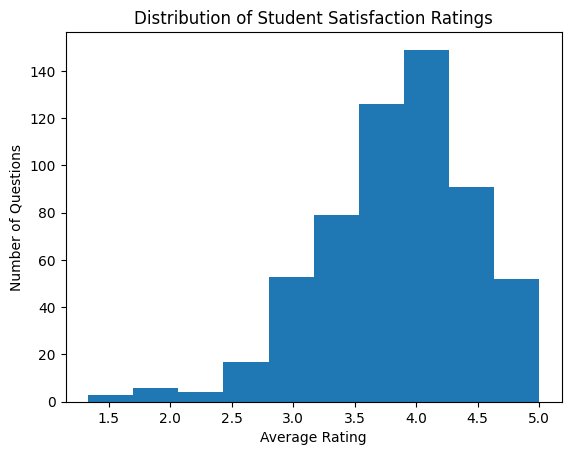

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Calculated_Average_Rating'], bins=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Questions')
plt.title('Distribution of Student Satisfaction Ratings')
plt.show()


### Insight: Distribution of Student Satisfaction Ratings

The histogram shows that most average ratings fall between 3.5 and 4.5, indicating moderate to high satisfaction among students. Very few responses appear at extreme low or high values, suggesting overall feedback is relatively consistent.


In [13]:
df.sort_values(
    by='Calculated_Average_Rating',
    ascending=False
)[['Course Name', 'Questions', 'Calculated_Average_Rating']].head(5)


,Course Name,Questions,Calculated_Average_Rating
11,FY B.VOC FOOD TECHNOLOGY,The teachers illustrate the concepts through e...,5.0
20,FYBA,How much of the syllabus was covered in the cl...,5.0
1,FY B.VOC FOOD TECHNOLOGY,How well did the teachers prepare for the clas...,5.0
229,MSC INFORMATION TECHNOLOGY - 1,Teachers inform you about your expected compet...,5.0
231,MSC INFORMATION TECHNOLOGY - 1,The teachers illustrate the concepts through e...,5.0


In [14]:
df.sort_values(
    by='Calculated_Average_Rating',
    ascending=True
)[['Course Name', 'Questions', 'Calculated_Average_Rating']].head(5)


,Course Name,Questions,Calculated_Average_Rating
212,MSC DATA SCIENCE - 1,The teachers identify your strengths and encou...,1.333333
207,MSC DATA SCIENCE - 1,The teaching and mentoring process in your ins...,1.333333
211,MSC DATA SCIENCE - 1,The teachers illustrate the concepts through e...,1.666667
17,FY B.VOC FOOD TECHNOLOGY,Efforts are made by the institute/ teachers to...,2.000000
7,FY B.VOC FOOD TECHNOLOGY,The teaching and mentoring process in your ins...,2.000000


In [2]:
course_avg = (
    df.groupby('Course Name')['Calculated_Average_Rating']
    .mean()
    .sort_values(ascending=False)
)

course_avg.head(10)


NameError: name 'df' is not defined

In [3]:
import pandas as pd


In [5]:
df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')


In [6]:
df['Calculated_Average_Rating'] = (
    (1 * df['Weightage 1'] +
     2 * df['Weightage 2'] +
     3 * df['Weightage 3'] +
     4 * df['Weightage 4'] +
     5 * df['Weightage 5'])
    / df['Total Feedback Given']
)


In [8]:
df.columns = df.columns.str.strip()
course_avg = (
    df.groupby('Course Name')['Calculated_Average_Rating']
    .mean()
    .sort_values(ascending=False)
)

course_avg.head(10)

,Calculated_Average_Rating
Course Name,
FYBA,4.550000
MSC ANALYTICAL CHEMISTRY SEM I,4.525000
TYBSC,4.522222
MSC INFORMATION TECHNOLOGY - 1,4.500000
SYBMS,4.357143
FY BCOM (BANKING & INSURANCE),4.350000
M.SC PART - 2 COMPUTER SCIENCE,4.228571
MSC INFORMATION TECHNOLOGY - 3,4.208333
S.Y.B.A.F,4.132609


In [9]:
top_10_courses = course_avg.head(10)
top_10_courses


,Calculated_Average_Rating
Course Name,
FYBA,4.550000
MSC ANALYTICAL CHEMISTRY SEM I,4.525000
TYBSC,4.522222
MSC INFORMATION TECHNOLOGY - 1,4.500000
SYBMS,4.357143
FY BCOM (BANKING & INSURANCE),4.350000
M.SC PART - 2 COMPUTER SCIENCE,4.228571
MSC INFORMATION TECHNOLOGY - 3,4.208333
S.Y.B.A.F,4.132609


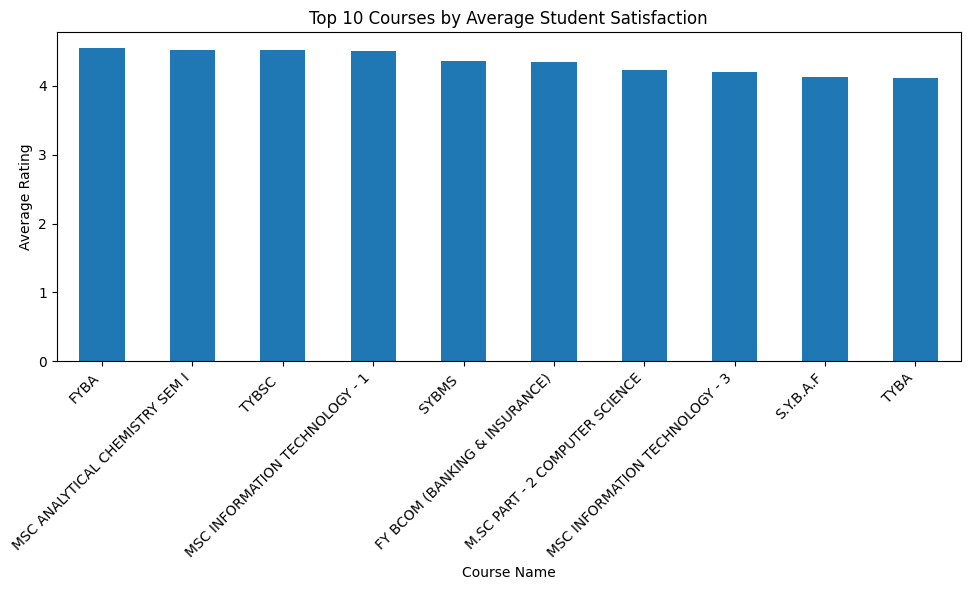

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_courses.plot(kind='bar')
plt.title('Top 10 Courses by Average Student Satisfaction')
plt.xlabel('Course Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insight: Top Performing Courses

The top-ranked courses consistently achieve average satisfaction ratings above 4.1. This indicates that students perceive these courses as delivering effective academic experiences compared to others.


In [11]:
bottom_10_courses = course_avg.tail(10)
bottom_10_courses


,Calculated_Average_Rating
Course Name,
MSC ANALYTICAL CHEMISTRY SEM III,3.542857
MA PSYCHOLOGY - 3,3.471429
M.SC PART - 1 COMPUTER SCIENCE,3.462500
MSC PHYSICS - 3,3.425000
FY B.VOC FOOD TECHNOLOGY,3.400000
MSC MICROBIOLOGY - 1,3.383333
MSC DATA SCIENCE - 3,3.366667
SY COMPUTER SCIENCE,3.353704
SYBSC,3.221429


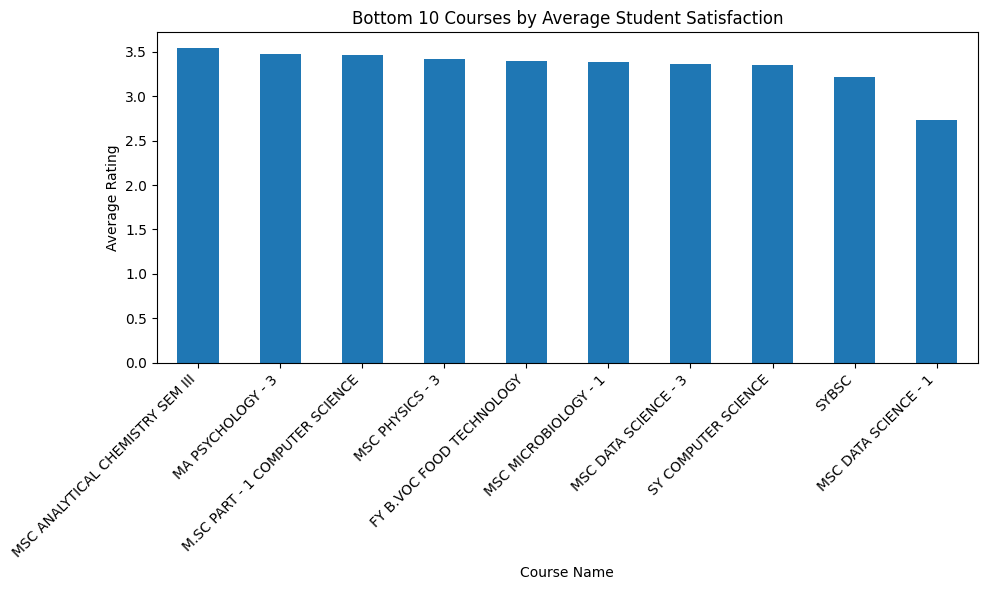

In [12]:
plt.figure(figsize=(10, 6))
bottom_10_courses.plot(kind='bar')
plt.title('Bottom 10 Courses by Average Student Satisfaction')
plt.xlabel('Course Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insight: Courses Requiring Attention

A small number of courses record low average satisfaction scores, ranging from approximately 1.3 to 2.5. These results highlight areas where targeted academic review and improvement initiatives may be required.


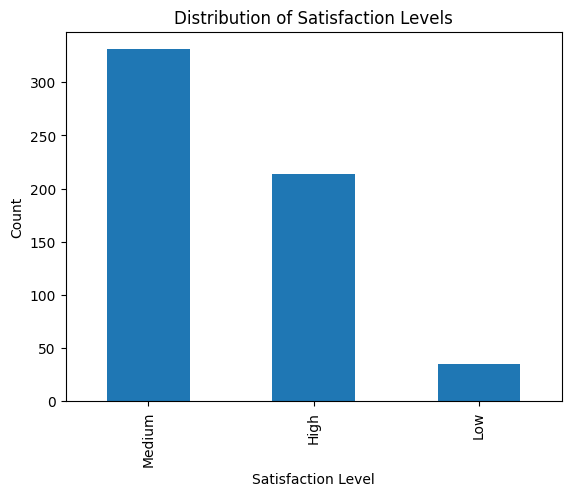

In [15]:
def satisfaction_band(rating):
    if rating < 3:
        return 'Low'
    elif rating <= 4:
        return 'Medium'
    else:
        return 'High'

df['Satisfaction_Level'] = df['Calculated_Average_Rating'].apply(satisfaction_band)

band_counts = df['Satisfaction_Level'].value_counts()
band_counts.plot(kind='bar')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Levels')
plt.show()


### Insight: Overall Satisfaction Levels

Most responses fall into the medium to high satisfaction categories. However, the presence of a low-satisfaction segment suggests opportunities for institutional improvement through focused interventions.


## Key Findings

- The overall average student satisfaction rating is approximately 3.84, indicating moderate to high satisfaction.
- Several courses consistently outperform others, achieving high average satisfaction scores.
- A limited number of courses show low satisfaction levels, signaling potential areas for improvement.
- Satisfaction varies significantly across courses, emphasizing the importance of course-specific evaluation.
